In [1]:
import matplotlib as mpl
mpl.rcParams['savefig.pad_inches'] = 0
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import mapview
from scipy.ndimage import gaussian_filter
import fkplotlib

%matplotlib notebook

<IPython.core.display.Javascript object>


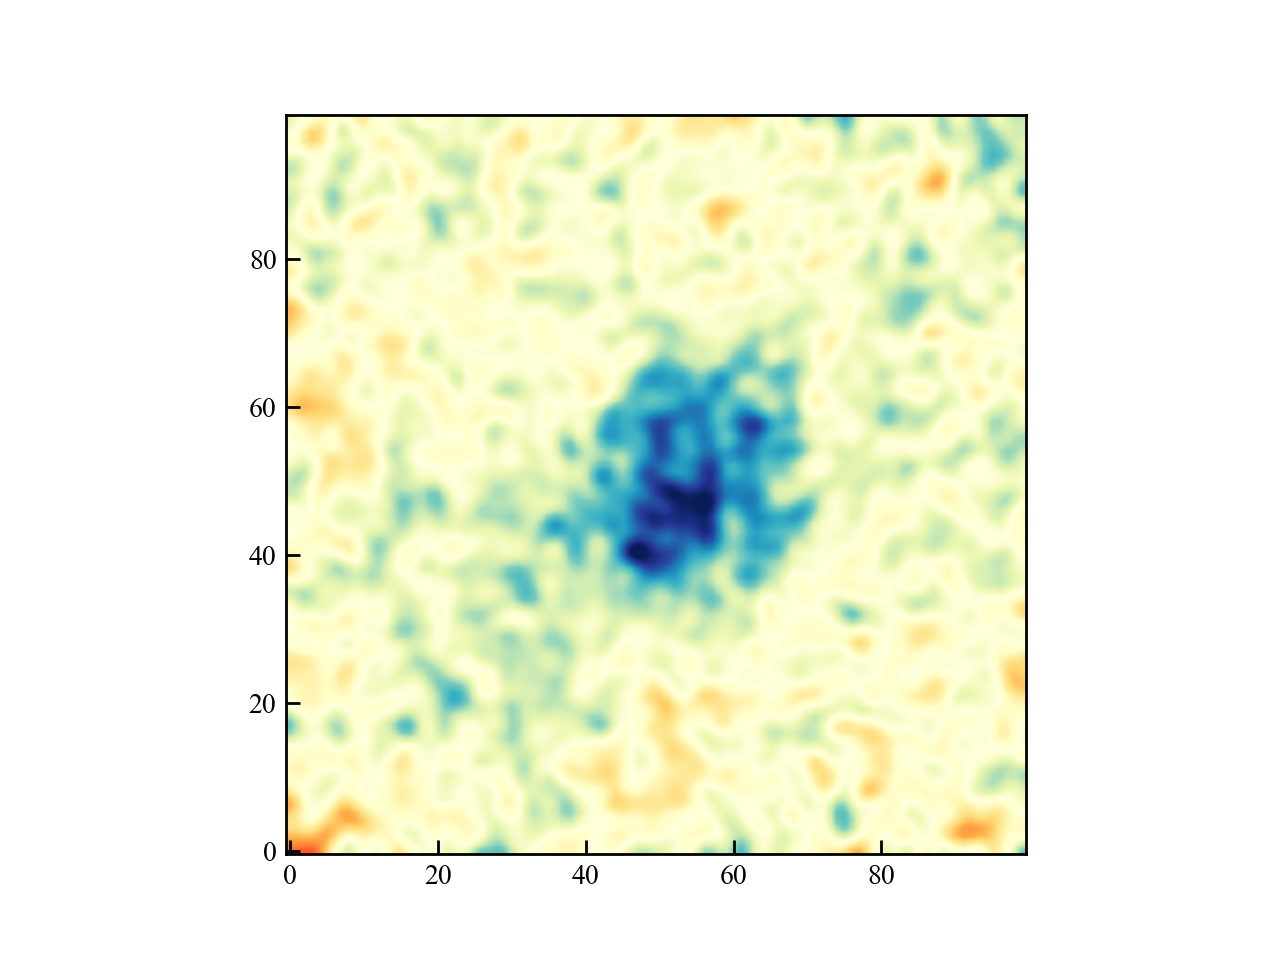

In [5]:
plt.close('all')
hdulist = fits.open("macsj1149_SZ.fits")
sc = SkyCoord(177.3976 * u.deg, 22.4011 * u.deg)
dat = hdulist[4].data
dat[dat > 0.0] *= 0.8
ct_d = Cutout2D(dat, sc, 5 * u.arcmin, wcs=WCS(hdulist[4].header))
ct_n = Cutout2D(hdulist[5].data, sc, 5 * u.arcmin, wcs=WCS(hdulist[5].header))

smooth = 1.2
dat = gaussian_filter(ct_d.data, smooth)
snr = gaussian_filter(ct_d.data / ct_n.data, smooth) * np.sqrt(2.0 * np.pi * smooth**2)
fig, ax = plt.subplots()
cmap = fkplotlib.get_cmap("better_spectral")
ax.imshow(dat, vmin=0.9 * dat.min(), vmax=-0.9 * dat.min(), origin="lower", interpolation="gaussian", cmap=cmap)
#ax.imshow(dat, vmin=0.9 * dat.min(), vmax=0.0, origin="lower", interpolation="gaussian", cmap="YlGnBu_r")

#ax.contour(-snr, levels=range(3, 20), origin="lower", colors="k")

In [9]:
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=1)
fig.savefig("macsj1149_SZ.pdf", bbox_inches="tight")

In [10]:
coords_frame = SkyCoord("11h49m35.86s +22d23m55.0s", frame="fk5")
ct_frame = Cutout2D(ct_d.data, coords_frame, 1.0 * u.arcmin, wcs=ct_d.wcs)
bbox = np.array(ct_frame.bbox_original)
print(bbox)
ct_frame.plot_on_original(color="k")
fig.savefig("macsj1149_SZ_frame.pdf", bbox_inches="tight")

[[37 56]
 [38 57]]
